In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# https://stackoverflow.com/questions/71762662/how-can-i-create-linearly-related-random-data-in-python

x = np.linspace(0, 4)
y = np.linspace(0, 3)

noise_factor = 0.85

def noise(k):
   return k+((random.random()*2)-1)*noise_factor

x = np.vectorize(noise)(x)
y = np.vectorize(noise)(y)

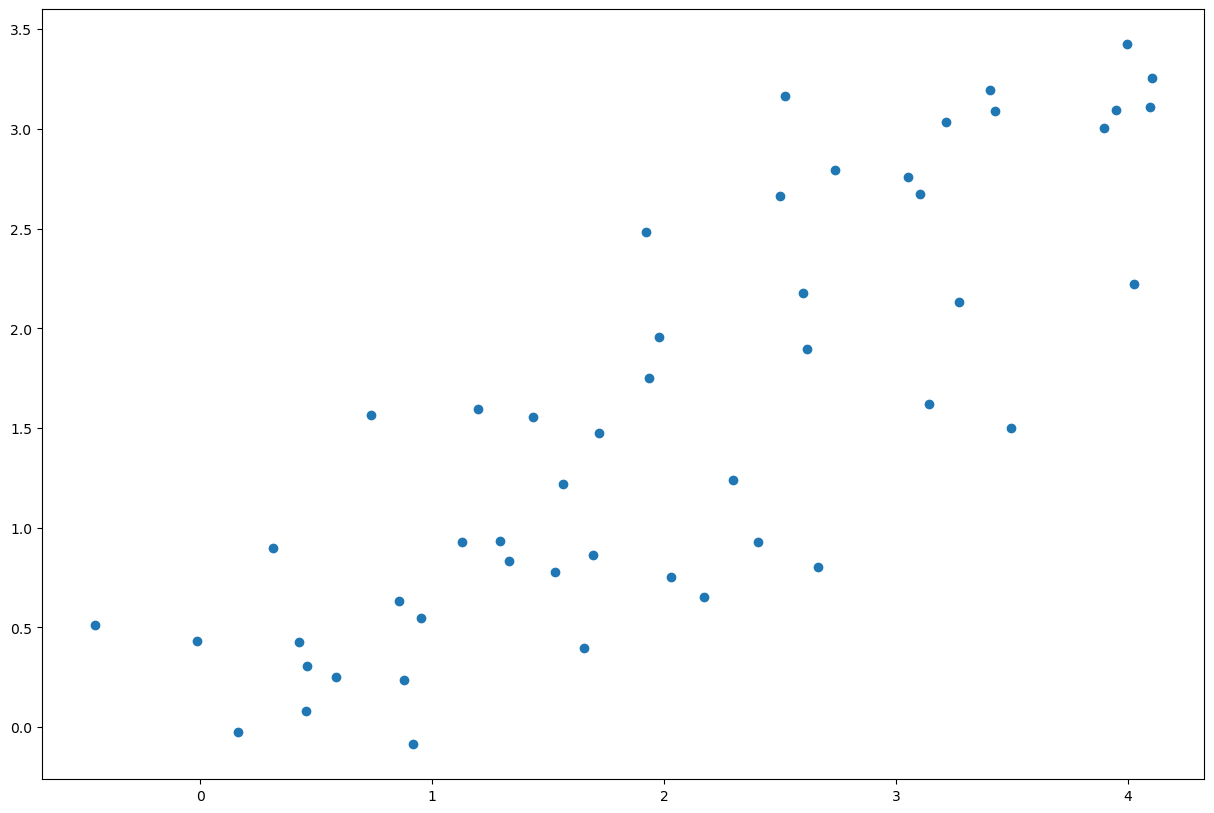

In [3]:
plt.figure(figsize = (15,10))
plt.scatter(x, y)
plt.show()

In [4]:
x.shape

(50,)

In [5]:
y.shape

(50,)

In [6]:
data = np.column_stack((x, y))

In [7]:
pca = PCA(n_components=2)
pca.fit(data)


PCA(n_components=2)

In [8]:
mean = pca.mean_

pc1 = pca.components_[0]


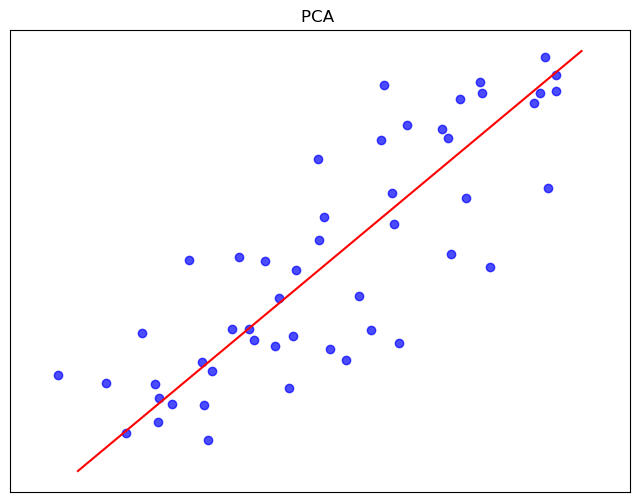

In [9]:
ax =plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='b', alpha=0.7, label='Data Points')
ax = plt.gca()
scale = 3  # controls the length of the line
line_points = np.array([mean - scale * pc1, mean + scale * pc1])
plt.plot(line_points[:, 0], line_points[:, 1], color='red', label='First Principal Component')
ax.set_xticks([])
ax.set_yticks([])
plt.axis('equal')
plt.title("PCA ")
plt.show()

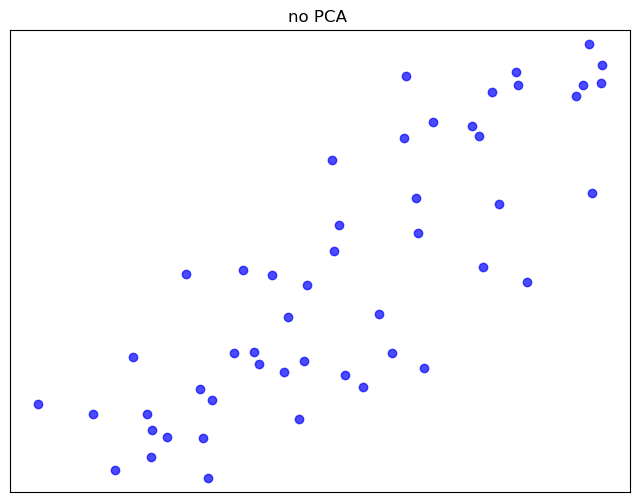

In [10]:
ax =plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='b', alpha=0.7, label='Data Points')
ax = plt.gca()

ax.set_xticks([])
ax.set_yticks([])
plt.axis('equal')
plt.title("no PCA ")
plt.show()

ChatGPT was used as a starting point for the following code:

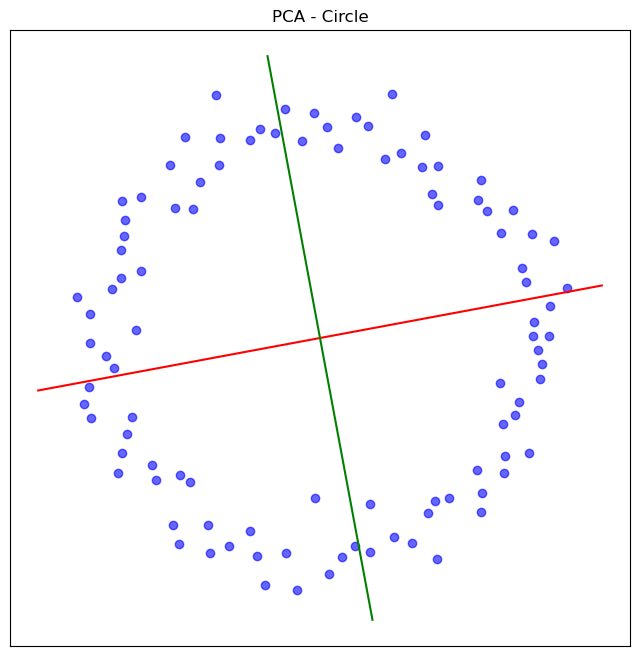

In [11]:
# Step 1: Generate circular data
np.random.seed(42)
theta = np.linspace(0, 2 * np.pi, 100)
r = 1 + 0.1 * np.random.randn(100)
x = r * np.cos(theta)
y = r * np.sin(theta)

data = np.column_stack((x, y))

# Step 2: PCA
pca = PCA(n_components=2)
pca.fit(data)

mean = pca.mean_
components = pca.components_

# Step 3: Plot
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.6, c='b', label='Data Points')
ax = plt.gca()
plt.axis('equal')
ax.set_xticks([])
ax.set_yticks([])

# Step 4: Plot PC1 and PC2 (PC1=red, PC2=green)
scale = 1.3  # Length scale for the lines
for i, color in zip([0, 1], ['r', 'g']):
    direction = components[i]
    line_points = np.array([mean - scale * direction, mean + scale * direction])
    plt.plot(line_points[:, 0], line_points[:, 1], color=color, label=f'PC{i+1}')

plt.title('PCA - Circle')

plt.show()

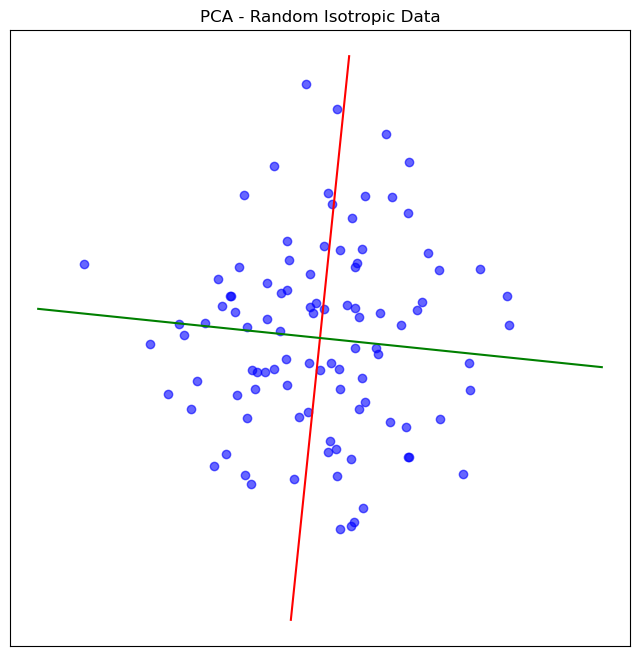

In [12]:
# Step 1: Generate 2D isotropic Gaussian data (no directional bias)
np.random.seed(42)
data = np.random.randn(100, 2)  # 100 samples, 2D

# Step 2: Fit PCA
pca = PCA(n_components=2)
pca.fit(data)

mean = pca.mean_
components = pca.components_

# Step 3: Plot
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1],c='b', alpha=0.6, label='Data Points')
plt.axis('equal')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])

# Step 4: Plot PC1 and PC2 as lines through the mean
scale = 3
for i, color in zip([0, 1], ['r', 'g']):
    direction = components[i]
    line_points = np.array([mean - scale * direction, mean + scale * direction])
    plt.plot(line_points[:, 0], line_points[:, 1], color=color, label=f'PC{i+1}')

plt.title('PCA - Random Isotropic Data')
plt.show()